<font size="5">Section 5: Structural Equation Modelling</font>

## Housekeeping and Data

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.linalg import eigh, cholesky
from scipy.stats import norm
import linearmodels.panel as lmp
from pylab import plot, show, axis, subplot, xlabel, ylabel, grid
import semopy 
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from IPython.display import Image


%matplotlib inline

Example using real purchase data (from Kaggle)

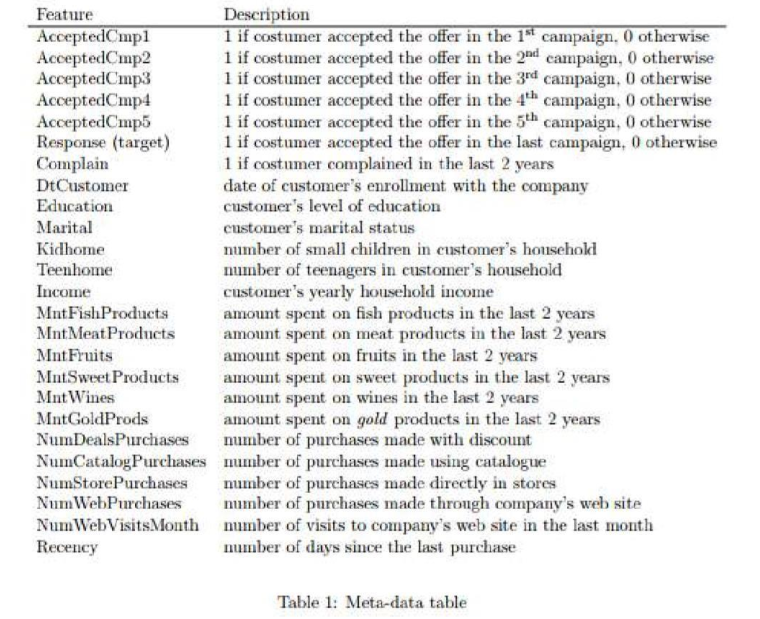

In [49]:
Image(filename='../data/dictionary.png', width=700) 

In [50]:
df=pd.read_csv('../data/ifood_df.csv')
df.describe()

,Recency,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,49.009070,51622.094785,0.442177,0.506576,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,28.932111,20713.063826,0.537132,0.544380,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,24.000000,35196.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,49.000000,51287.000000,0.000000,0.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,74.000000,68281.000000,1.000000,1.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,99.000000,113734.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [51]:
df1 = df[df.columns[pd.Series(df.columns).str.startswith(('Mnt','AcceptedCmpOverall','Num'))]]
df1 = df1.drop(['MntTotal','MntRegularProds'], axis=1)
df2  = (df1-df1.mean())/df1.std()

df1.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.29932
std,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.68044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.00000
50%,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.00000
75%,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.00000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,4.00000


<Axes: >

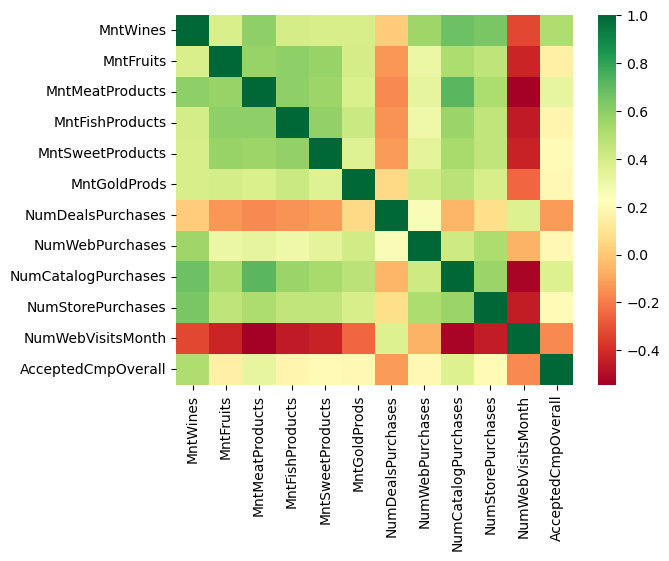

In [52]:
sns.heatmap(df2.corr(), cmap='RdYlGn')

## PCA

PCA for continous variables in this example using sklearn. We can select the number of components to be estimated or use *'mle'* to determine the optimal number of eigenvalues based on the variance of the data.

Then we can report the Scree Plot that shows the percentage of variance that each component contributes. Based on the results, the data can be summarized using three components.

Finally, we can use the estimated components and transform them into a data frame. We can also show that, by construction, the components are orthogonal (zero covariance).

In [53]:
pca = PCA(n_components=12)
pca_features = pca.fit_transform(df2)
print(pca.explained_variance_ratio_)

[0.447654 0.130947 0.091725 0.059665 0.052647 0.045909 0.036867 0.035682
 0.032306 0.027348 0.021983 0.017268]


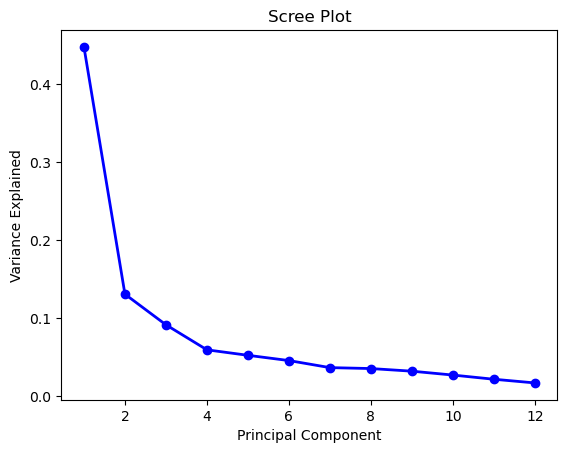

In [54]:
#scree plot using explained variance proportion

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [55]:
pca = PCA(n_components=3)
pca_features = pca.fit_transform(df2)
print(pca.explained_variance_ratio_)

[0.447654 0.130947 0.091725]


In [56]:
pca_vectors = pd.DataFrame(data = pca.components_)
pca_vectors.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.330189,0.309861,0.355047,0.320745,0.310502,0.257600,-0.051530,0.240904,0.364790,0.321808,-0.269813,0.182032
1,0.234192,-0.140038,-0.124832,-0.151663,-0.121565,0.180107,0.636683,0.488572,0.015715,0.179842,0.400189,0.054165
2,0.356852,-0.290142,0.046588,-0.262506,-0.231754,-0.165778,-0.254117,-0.049829,0.101755,-0.062559,-0.002681,0.744895


In [57]:
pca_df = pd.DataFrame(data=pca_features,columns=['PC1', 'PC2', 'PC3'])
pca_df.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,PC1,PC2,PC3
count,2205.000,2205.000,2205.000
mean,0.000,0.000,-0.000
std,2.318,1.254,1.049
min,-4.737,-2.705,-3.724
25%,-2.070,-0.895,-0.445
50%,-0.700,-0.314,-0.054
75%,1.934,0.708,0.192
max,6.996,5.618,5.518


In [58]:
pca_df.corr().apply(lambda s: s.apply('{0:.3f}'.format))

,PC1,PC2,PC3
PC1,1.000,-0.000,-0.000
PC2,-0.000,1.000,0.000
PC3,-0.000,0.000,1.000


<Axes: xlabel='PC2', ylabel='PC3'>

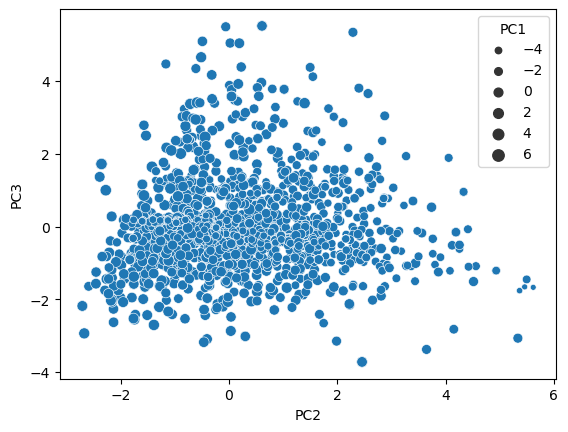

In [59]:
#dfa = pd.merge(df2, pca_df, how='inner')
#dfa.head()
sns.scatterplot(data=dfa, x='PC2', y='PC3', size='PC1')

## EFA

EFA example using factor_analyzer library. Output shows the factor loadings for each factor, and the eigenvalues, which can be used to construct a scree plot. Number of factors can be chosen or estimated optimally from the data.

Using the semopy library we can also infer which variables belong to each factor, based on the estimated factor loadings (criteria does not restrict unique loadings to each factor). Estimated number of factors chosen optimally base on the data.

Note that semopy yields less factors than factor_analyzer. The difference is due that factor_analyzer reports factors until eigenvalues are irrelevant (variance explained), while semopy presents a potential EFA where all coeficients are statistically significant. In this case, the third factor is mainly only loading to X1 an it contributes to a small proportion of the total explained variance.

Finally semopy reports that the variance-covariance matrix in the dataframe is not positive definite, meaning that some variables are highly correlated (as expected by design), meaning that estimates are likely to be untrustworty. 

In [60]:
df1.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.29932
std,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.68044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.00000
50%,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.00000
75%,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.00000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,4.00000


In [61]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation='varimax').fit(df1)

In [62]:
np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})
fa.loadings_

array([[0.340339, 0.895321, 0.176540],
       [0.734542, 0.136811, -0.032510],
       [0.677215, 0.439821, -0.137430],
       [0.762317, 0.151979, -0.054021],
       [0.705341, 0.174587, -0.026491],
       [0.488614, 0.235046, 0.206958],
       [-0.120179, -0.055658, 0.629742],
       [0.373243, 0.370985, 0.553635],
       [0.638647, 0.534248, -0.001283],
       [0.564642, 0.418644, 0.212452],
       [-0.562765, -0.251243, 0.400254],
       [0.107056, 0.529160, -0.082942]])

In [63]:
fa.get_eigenvalues()

(array([5.371849, 1.571363, 1.100704, 0.715975, 0.631769, 0.550903,
        0.442410, 0.428180, 0.387667, 0.328173, 0.263796, 0.207211]),
 array([4.986588, 1.112374, 0.621023, 0.193173, 0.118434, 0.063919,
        0.018537, -0.017025, -0.025789, -0.083773, -0.101366, -0.166109]))

In [64]:
fa.get_communalities()

array([0.948596, 0.559326, 0.670950, 0.607143, 0.528688, 0.336821,
       0.414116, 0.583452, 0.693292, 0.539219, 0.540031, 0.298351])

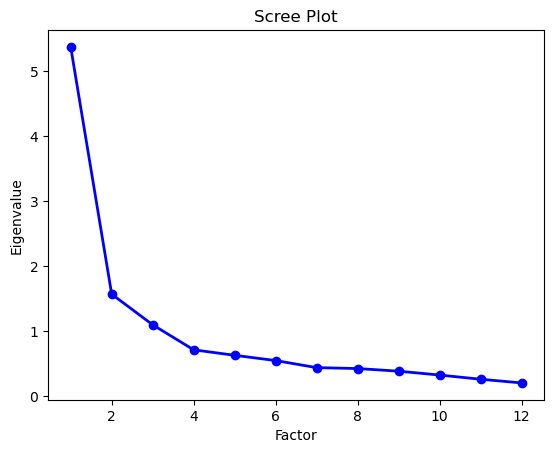

In [65]:
values = np.arange(1,13)
eigenvalues = pd.DataFrame(data=fa.get_eigenvalues())
plt.plot(values, eigenvalues.loc[0], 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.show()

In [66]:
fa.get_factor_variance()

(array([3.639988, 2.067129, 1.012869]),
 array([0.303332, 0.172261, 0.084406]),
 array([0.303332, 0.475593, 0.559999]))

EFA example using semopy

In [67]:
print(semopy.efa.explore_cfa_model(df1, pval=0.05))

eta1 =~ MntMeatProducts + MntFishProducts + MntFruits + MntSweetProducts + MntWines + MntGoldProds



## Latent clases

R package adapted for Python can be used, called stepmix (install with pip)

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.96it/s, max_LL=-8.72e+4, max_avg_LL=-39.5]

MODEL REPORT
    Measurement model parameters


          model_name                      gaussian_diag           
          class_no                                    0          1
          param       variable                                    
          covariances AcceptedCmpOverall         0.6963     0.0000
                      MntFishProducts         3921.1870    53.4076
                      MntFruits               2107.6292    28.8867
                      MntGoldProds            3333.6166   188.4982
                      MntMeatProducts        56133.3253   550.8797
                      MntSweetProducts        2266.3747    31.0609
                      MntWines              109297.3235  4645.8908
                      NumCatalogPurchases        7.3474     0.4254
                      NumDealsPurchases          4.9364     1.6801
                      NumStorePurchases          9.3851     1.2097
                      NumWebPurchases            6.9685     2.1650
                      NumWebVisitsMonth          6.3215     3.

Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.55it/s, max_LL=-8.48e+4, max_avg_LL=-38.5]

MODEL REPORT
    Measurement model parameters


          model_name                      gaussian_diag                         
          class_no                                    0            1           2
          param       variable                                                  
          covariances AcceptedCmpOverall         0.0828       0.6520      0.0000
                      MntFishProducts           32.0978    4388.0661   3424.4740
                      MntFruits                 13.1149    2151.8420   1911.1675
                      MntGoldProds              88.7475    3722.2536   2871.0780
                      MntMeatProducts          118.6245   76667.8395  41005.7821
                      MntSweetProducts          15.3555    2521.3634   1957.8646
                      MntWines                 628.4581  121795.8956  70267.0964
                      NumCatalogPurchases        0.2667       8.0926      6.3264
                      NumDealsPurchases          0.9217       3.8173      4.9926
                      NumSto

Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.41it/s, max_LL=-7.93e+4, max_avg_LL=-36]


MODEL REPORT
    Measurement model parameters
          model_name                      gaussian_diag                                   
          class_no                                    0           1            2         3
          param       variable                                                            
          covariances AcceptedCmpOverall         0.0000      0.3292       0.7474    0.0000
                      MntFishProducts         3615.4530     40.9491    4401.4753   36.2097
                      MntFruits               2045.4943     21.7052    2260.4676   17.7642
                      MntGoldProds            3201.5534    719.5328    4042.6602   99.1486
                      MntMeatProducts        45745.5170   1167.4782   63985.2940  172.7180
                      MntSweetProducts        2112.0901     18.6516    2564.1064   20.4718
                      MntWines               74329.5433  56288.0853  109258.2676  809.3333
                      NumCatalogPurchases   

Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.34it/s, max_LL=-7.87e+4, max_avg_LL=-35.7]


MODEL REPORT
    Measurement model parameters
          model_name                      gaussian_diag                                               
          class_no                                    0            1           2         3           4
          param       variable                                                                        
          covariances AcceptedCmpOverall         0.5356       0.8030      0.2550    0.0000      0.0000
                      MntFishProducts          181.1706    4250.8915     43.1211   34.3103   3633.3584
                      MntFruits                195.7113    2447.9378     25.2684   14.9188   2056.6373
                      MntGoldProds            4411.3855    3883.6639    298.0002   73.4473   2993.7077
                      MntMeatProducts         5068.4887   58417.3732    922.1174   94.2273  46124.4624
                      MntSweetProducts         158.1096    2600.4895     28.5342   17.5185   2135.0146
                      MntWi

Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.22it/s, max_LL=-7.81e+4, max_avg_LL=-35.4]


MODEL REPORT
    Measurement model parameters
          model_name                      gaussian_diag                                                         
          class_no                                    0           1        2            3           4          5
          param       variable                                                                                  
          covariances AcceptedCmpOverall         0.0000      0.2915   0.1628       0.4772      0.8534     0.0000
                      MntFishProducts         3641.7674     45.6510   1.9226    2070.5563   4493.4243    46.1383
                      MntFruits               2059.9154     22.6475   0.9027     603.0333   2656.9639    25.0301
                      MntGoldProds            3232.7187    456.9523  24.5688    3941.9766   4074.4088   127.5971
                      MntMeatProducts        44899.2761   1108.8577  10.9772   11005.5430  56541.5289   210.1015
                      MntSweetProducts        2137

Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.60it/s, max_LL=-7.5e+4, max_avg_LL=-34]

MODEL REPORT
    Measurement model parameters
          model_name                      gaussian_diag                                                                        
          class_no                                    0            1           2           3         4           5            6
          param       variable                                                                                                 
          covariances AcceptedCmpOverall         0.0000       0.6185      0.0000      0.0000    0.0000      0.2906       0.5524
                      MntFishProducts         2658.4862      95.5805   4255.5924   4431.4536   35.1749     15.5525    4233.6000
                      MntFruits               1642.1893      50.5363   2245.0574   1902.6701   16.0209      8.7767    2822.1461
                      MntGoldProds            3123.4408    3630.5377   2979.4934   3822.0647   84.2701    280.8317    3878.0063
                      MntMeatProducts        13914.4808   


c:\Users\juanc\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\juanc\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

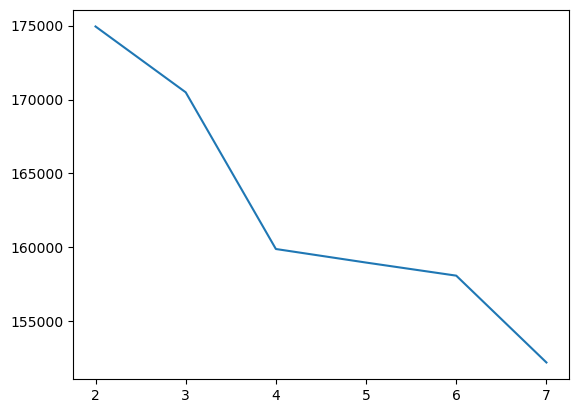

In [68]:
from stepmix.stepmix import StepMix

# Numero optimo de clusters
K = range(2, 8)
fits = []
BIC = []

for k in K:
    # train the model for current value of k on training data
    model = StepMix(n_components=k, measurement='continuous', verbose=1, random_state=123).fit(df1)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    BIC.append(model.sabic(df1))

sns.lineplot(x = K, y = BIC)    

In [69]:
# Continuous StepMix Model with 3 latent classes
model = StepMix(n_components=3, measurement="continuous", verbose=1, random_state=123)

# Fit model and predict clusters
model.fit(df1)
df1['pred']=model.predict(df1)

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.56it/s, max_LL=-8.48e+4, max_avg_LL=-38.5]

MODEL REPORT
    Measurement model parameters
          model_name                      gaussian_diag                         
          class_no                                    0            1           2
          param       variable                                                  
          covariances AcceptedCmpOverall         0.0828       0.6520      0.0000
                      MntFishProducts           32.0978    4388.0661   3424.4740
                      MntFruits                 13.1149    2151.8420   1911.1675
                      MntGoldProds              88.7475    3722.2536   2871.0780
                      MntMeatProducts          118.6245   76667.8395  41005.7821
                      MntSweetProducts          15.3555    2521.3634   1957.8646
                      MntWines                 628.4581  121795.8956  70267.0964
                      NumCatalogPurchases        0.2667       8.0926      6.3264
                      NumDealsPurchases          0.9217       3

In [70]:
df1.groupby(['pred'])[['MntWines','NumStorePurchases','AcceptedCmpOverall']].mean()

,MntWines,NumStorePurchases,AcceptedCmpOverall
pred,,,
0,24.051768,2.926768,0.084596
1,708.430380,7.751899,1.501266
2,369.561886,7.329077,0.000000


<Axes: xlabel='NumStorePurchases', ylabel='MntWines'>

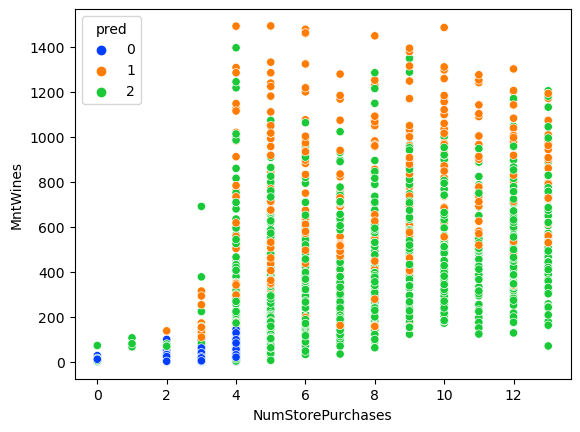

In [73]:
sns.scatterplot(data=df1, x='NumStorePurchases', y='MntWines', hue='pred', palette="bright")

## Latent growth

Latent growth modelling is not available on Python at this time. Example available in R for the lavaan library at https://lavaan.ugent.be/tutorial/growth.html

Latent trajectory class (growth curves and class membership) is not available on Python at this time. Example available in R using the LCTMtools library at https://rstudio-pubs-static.s3.amazonaws.com/522393_3aa7f65898f8426e9c0a92d7971b619d.html.

## General CFA

Based on the EFA results we implement a CFA using the semopy library. We declare the model, just as the suggestion in section 3, as a model object, then we declare the model and fit using the data (variable X1 not included since is not used). The output shows the optimized value of the log-likelihood, number of iterations and estimation method used. 

First, note that measurements load into multiple factors, leading to interpretation issues (specially since variables correlate negatively with one factor and positively with the other). Secondly, we observe small covariance between factors, and substatial diferences in the residual error variance across measurements (particularly large error variance in X8). Finally, we can report the fit indices of the model, which allows to compare against alternative specifications in the data.

Also, if you install the graphviz package (and python-graphviz), you can provide a visualization of the estimated model using the semplot function.

In [167]:
mod = """
# measurement model
eta1 =~ MntMeatProducts + MntFishProducts + MntFruits + MntSweetProducts + MntWines + MntGoldProds
eta2 =~ NumCatalogPurchases + NumDealsPurchases + NumStorePurchases + NumWebPurchases + NumWebVisitsMonth 
    """

model = semopy.Model(mod)
out=model.fit(df1)
print(out)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 1.461
Number of iterations: 146
Params: 0.344 0.234 0.243 2.313 0.255 -0.077 0.995 0.617 -0.604 5.445 1510.498 2530.529 3.860 2.447 5.185 23902.378 3.524 1266.820 1225.424 56925.549 4.137 207.145 9231.351


In [168]:
model.inspect(mode='list', what="names", std_est=True)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,MntMeatProducts,~,eta1,1.000000,0.527834,-,-,-
1,MntFishProducts,~,eta1,0.344277,0.648135,0.015506,22.202385,0.0
2,MntFruits,~,eta1,0.233724,0.539946,0.011818,19.77629,0.0
3,MntSweetProducts,~,eta1,0.243273,0.548921,0.012166,19.996684,0.0
4,MntWines,~,eta1,2.312873,0.681557,0.101197,22.855229,0.0
5,MntGoldProds,~,eta1,0.255277,0.438254,0.014999,17.019087,0.0
6,NumCatalogPurchases,~,eta2,1.000000,0.792668,-,-,-
7,NumDealsPurchases,~,eta2,-0.076861,-0.082989,0.020802,-3.69482,0.00022
8,NumStorePurchases,~,eta2,0.994923,0.664287,0.031065,32.027011,0.0
9,NumWebPurchases,~,eta2,0.616875,0.473575,0.028154,21.910859,0.0


In [169]:
semopy.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,43,55,3221.422647,0.0,13610.978111,0.765534,0.763322,0.697272,0.763322,0.700101,0.183133,43.078075,174.143179,1.460963


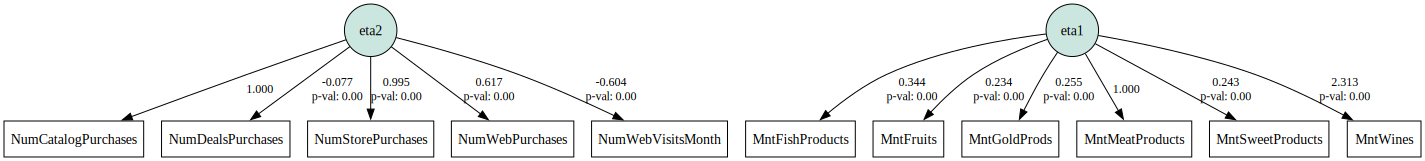

In [171]:
semopy.semplot(model, "model.png")

## Complete SEM example

SEM example considering both the measurement part and structural part in semopy (data and model provided at https://semopy.com/tutorial.html). This example presents a model where three factors are estimated from the data, where each measurement loads only into one factor. The first part of the model is as noted in section 6 (measurement only). Second part (regrssions) reports the structural relationships between factors, and the last part reports potential correlations between the error in each measure (this could be use in section 6 to improve final model). 

In [ ]:
import semopy
import pandas as pd
desc = semopy.examples.political_democracy.get_model()
print(desc)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


In [ ]:
data = semopy.examples.political_democracy.get_data()
mod = semopy.Model(desc)
res = mod.fit(data)

In [ ]:
print(mod.inspect())

     lval  op   rval  Estimate  Std. Err    z-value   p-value
0   dem60   ~  ind60  1.482379  0.399024   3.715017  0.000203
1   dem65   ~  ind60  0.571912  0.221383   2.583364  0.009784
2   dem65   ~  dem60  0.837574  0.098446   8.507992       0.0
3      x1   ~  ind60  1.000000         -          -         -
4      x2   ~  ind60  2.180494  0.138565  15.736254       0.0
5      x3   ~  ind60  1.818546  0.151993   11.96465       0.0
6      y1   ~  dem60  1.000000         -          -         -
7      y2   ~  dem60  1.256819  0.182687   6.879647       0.0
8      y3   ~  dem60  1.058174  0.151521   6.983699       0.0
9      y4   ~  dem60  1.265186  0.145151   8.716344       0.0
10     y5   ~  dem65  1.000000         -          -         -
11     y6   ~  dem65  1.185743  0.168908   7.020032       0.0
12     y7   ~  dem65  1.279717  0.159996    7.99841       0.0
13     y8   ~  dem65  1.266084  0.158238   8.001141       0.0
14  dem60  ~~  dem60  3.950849  0.920451   4.292296  0.000018
15  dem6

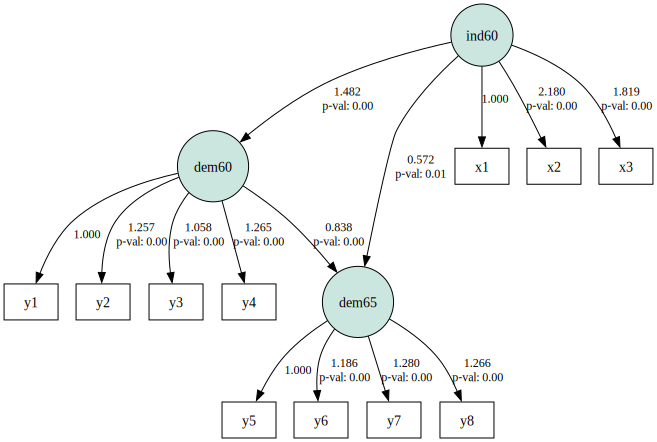

In [ ]:
semopy.semplot(mod, "semmodel.png")

<font size="3">**Tarea 3**</font>

<u> *Instrucciones* </u>

Los resultados de los ejericicios propuestos se deben entregar como un notebook por correo electronico a *juancaros@udec.cl* el dia 9/6 hasta las 21:00. Es importante considerar que el código debe poder ejecutarse en cualquier computadora con la data original del repositorio. Recordar la convencion para el nombre de archivo ademas de incluir en su documento titulos y encabezados por seccion. Utilizar la base de datos junaeb2.csv, el diccionario de datos es el siguiente:

- sexo: sexo del estudiante
- edad: edad del estudiante (meses)
- imce: indice de masa corporal estandarizado
- vive_padre: si el padre vive en el hogar
- vive_madre: si la madre vive en el hogar
- area: urbana=1, rural=0
- sk1: muestra afecto a padres (1: siempre - 5: nunca)
- sk2: muestra afecto a sus pares (1: siempre - 5: nunca)
- sk3: expresa sus sentimientos (1: siempre - 5: nunca)
- sk4: usa gestos para mostrar sentimientos (1: siempre - 5: nunca)
- sk5: juega con otros (1: siempre - 5: nunca)
- sk6: comparte sus cosas con otros (1: siempre - 5: nunca)
- sk7: es agresivo (1: siempre - 5: nunca)
- sk8: participa en juegos grupales (1: siempre - 5: nunca)
- sk9: hace preguntas a adultos (1: siempre - 5: nunca) 
- sk10: tiene interes por libros (1: siempre - 5: nunca) 
- sk11: tiene interes por su entorno (1: siempre - 5: nunca)
- sk12: juega a armar y desarmar cosas (1: siempre - 5: nunca) 
- sk13: tiene expresiones artisticas (1: siempre - 5: nunca) 
- act_fisica: frecuencia actividad fisica (1: nunca - 5: 5 o mas veces a la semana)
- educm: años de escolaridad de la madre
- educp: años de escolaridad del padre
- madre_work: si la madre trabaja (-1: labor domestica, 0: desempleada, 1: empleada)

Preguntas:

1. Cargue la base de datos y realice los ajustes necesarios para su uso (missing values, recodificar variables, etcetera). Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario.

2. Usando las variables sk1-sk13 realice un PCA. En particular, identifique los valores propios y determine el numero optimo de componentes. Luego estime y grafique la distribucion de los componentes. Ademas discuta la importancia relativa de las variables sobre cada uno de los componentes estimados. Que se puede concluir de este analisis?

3. Con los resultados de la Pregunta 2, mantenga los primeros 3 componentes principales. Graficamente indique si existen diferencias significativas entre grupos usando las siguientes variables: sexo, area, madre_work y act_fisica. Que puede concluir de los resultados?

4. A partir del mismo set de variables sk1-sk13 realice un EFA. En particular determine el numero optimo de factores y las variables que se asocian a cada factor. Tambien discuta si existen variables que no son informativas (Hint: para realizar un EFA, todas las variables deben estar representatadas en el mismo sentido logico. Si una carateristica es negativa debe ser invertida en la escala, de tal forma que todas las variables representen aspectos positivos).

5. Con los resultados obtenidos en la Pregunta 4, proponga un CFA donde cada variable solo se asocia con un factor. Entregue un nombre a cada factor que representa el concepto comun entre todas las variables. Reporte la importancia de cada medida (variable) a cada factor e indique la correlacion entre factores. 

6. Finalmente, implemente un SEM completo usando la estructura propuesta en la Pregunta 5. En particular, estime un modelo donde los factores explican el nivel de actividad fisica, junto con otras variables que existen en la base de datos. Ademas utilice otras variables relevantes de la base de datos para explicar los factores latentes. Las variables a incluir en el modelo final deben tener sustento teorico y el modelo final debe optimizar el ajuste a los datos, en base a los criterios vistos en clase. Que puede concluir en base a sus resultados?